In [214]:
import mammoth
from IPython.core.display import display, HTML
import subprocess
import os
import glob
import string
import stat
import random
from bs4 import BeautifulSoup
import re
from difflib import SequenceMatcher
import shutil 
import filecmp
import difflib

In [3]:
# COUNT THE DOC AND DOCX FILES

allDocFilesGlob = "/Users/mettinger/Desktop/2018_AS/**/*.docx"
allFilesDocx = glob.glob(allDocFilesGlob, recursive=True)

allDocFilesGlob = "/Users/mettinger/Desktop/2018_AS/**/*.doc"
allFilesDoc = glob.glob(allDocFilesGlob, recursive=True)

print("doc: %s\ndocx: %s" % (str(len(allFilesDoc)), str(len(allFilesDocx))))

doc: 3029
docx: 2264


In [4]:
# CONVERT FROM DOC TO DOCX SO MAMMOTH CAN CONVERT TO HTML

docFilesConverted = []
for i,filename in enumerate(allFilesDoc):
    if i % 100 == 0:
        print(i)
    os.chdir('/'.join(filename.split('/')[0:-1]))
    if filename.endswith('.doc'):
        docFilesConverted.append(filename)
        subprocess.call(['/Applications/LibreOffice.app/Contents/MacOS/soffice', '--headless', '--convert-to', 'docx', filename])

In [104]:
# COUNT THE DOC AND DOCX FILES

allDocFilesGlob = "/Users/mettinger/Desktop/2018_AS/**/*.docx"
allFilesDocx = glob.glob(allDocFilesGlob, recursive=True)

allDocFilesGlob = "/Users/mettinger/Desktop/2018_AS/**/*.doc"
allFilesDoc = glob.glob(allDocFilesGlob, recursive=True)

print("doc: %s\ndocx: %s" % (str(len(allFilesDoc)), str(len(allFilesDocx))))

doc: 0
docx: 5288


In [100]:
allDocFilesGlob = "/Users/mettinger/Desktop/2018_AS/**/*.docx"
allFilesDocx = glob.glob(allDocFilesGlob, recursive=True)

numFile = len(allFilesDocx)

for i in range(10):
    os.mkdir("/Users/mettinger/Desktop/rockArtProjectData/anikaDocx" + str(i))
    
for i,filePath in enumerate(allFilesDocx):
    fileName = filePath.split("/")[-1]
    index = str(int( (i * 10) / numFile))
    destPath = "/Users/mettinger/Desktop/rockArtProjectData/anikaDocx" + index + "/" + fileName
    shutil.copyfile(filePath, destPath)


In [105]:
# REMOVE TILDA FILES

allTildaFilesGlob = "/Users/mettinger/Desktop/rockArtProjectData/**/~*.docx"
allTildaFiles = glob.glob(allTildaFilesGlob, recursive=True)

for thisFile in allTildaFiles:
    os.remove(thisFile)
print("tilda removed: " + str(len(allTildaFiles)))

tilda removed: 0


In [106]:
# FIND IDENTICAL FILES

allDocFilesGlob = "/Users/mettinger/Desktop/rockArtProjectData/**/*.docx"
allFilesDocx = glob.glob(allDocFilesGlob, recursive=True)
print(len(allFilesDocx))

identicalDict = {}

for i,filename in enumerate(allFilesDocx):
    flag = False
    if i % 1000 == 0:
        print(i)
    for thisKey in identicalDict.keys():
        if filecmp.cmp(thisKey, filename):
            identicalDict[thisKey].append(filename)
            flag = True
            break
    if not flag:
        identicalDict[filename] = []
        
print("repeated files: " + str(sum([len(value) for key,value in identicalDict.items()])))

6555
0
1000
2000
3000
4000
5000
6000
663


In [111]:
# DELETE IDENTICAL FILES

for thisKey in identicalDict.keys():
    thisFileList = identicalDict[thisKey]
    for thisFile in thisFileList:
        os.remove(thisFile)

In [167]:
# CHECK IDENTICAL DOCX FILES HAVE BEEN ELIMINATED

allDocFilesGlob = "/Users/mettinger/Desktop/rockArtProjectData/**/*.docx"
allFilesDocx = glob.glob(allDocFilesGlob, recursive=True)
print(len(allFilesDocx))

identicalDict = {}

for i,filename in enumerate(allFilesDocx):
    flag = False
    if i % 1000 == 0:
        print(i)
    for thisKey in identicalDict.keys():
        if filecmp.cmp(thisKey, filename):
            identicalDict[thisKey].append(filename)
            flag = True
            break
    if not flag:
        identicalDict[filename] = []
        
print("repeated files: " + str(sum([len(value) for key,value in identicalDict.items()])))

5892
0
1000
2000
3000
4000
5000
repeated files: 0


In [158]:
def stripInfo(soup):
    regExpList = [r'Coffman', r'149 Atlantic',r'Swampscott',r'\$\d*\.\d\d']
    for thisRegExp in regExpList:
        for elem in soup(text=re.compile(thisRegExp)):
            elem.parent.decompose()

In [159]:
# CONVERT TO HTML, DELETE SENSITIVE INFORMATION (ADDRESS, ORDER INFO, ETC....), SAVE HTML FILE

allDocFilesGlob = "/Users/mettinger/Desktop/rockArtProjectData/**/*.docx"
allFiles = glob.glob(allDocFilesGlob, recursive=True)
convertErrors = []
regExErrors = []
writeErrors = []
print(len(allFiles))

for i,filename in enumerate(allFiles):
    if i % 1000 == 0:
        print(i)
    with open(filename, "rb") as docx_file:
        try:
            result = mammoth.convert_to_html(docx_file)
            html = result.value
            soup = BeautifulSoup(html, 'html.parser')
            try:
                stripInfo(soup)
                html = str(soup)
                try:
                    thisFileName = filename[0:-5] + ".html"
                    with open(thisFileName, "w") as thisHtmlFile:
                        thisHtmlFile.write(str(html))
                except:
                    writeErrors.append(filename)
            except:
                regExErrors.append(filename)
        except:
            convertErrors.append(filename)
    
len(writeErrors), len(regExErrors), len(convertErrors)

5892
0
1000
2000
3000
4000
5000


In [162]:
# FIND IDENTICAL HTML FILES

allFilesGlob = "/Users/mettinger/Desktop/rockArtProjectData/**/*.html"
allFiles = glob.glob(allFilesGlob, recursive=True)
print(len(allFiles))

identicalDict = {}

for i,filename in enumerate(allFiles):
    flag = False
    if i % 1000 == 0:
        print(i)
    for thisKey in identicalDict.keys():
        if filecmp.cmp(thisKey, filename):
            identicalDict[thisKey].append(filename)
            flag = True
            break
    if not flag:
        identicalDict[filename] = []
        
print("repeated files: " + str(sum([len(value) for key,value in identicalDict.items()])))

5810
0
1000
2000
3000
4000
5000
repeated files: 1316


In [187]:
# DELETE IDENTICAL HTML FILES AND CORRESPONDING DOCX FILES

htmlRemoveErrors = []
docxRemoveErrors = []

for thisKey in identicalDict.keys():
    thisFileList = identicalDict[thisKey]
    for thisFile in thisFileList:
        thisDocxFile = thisFile[0:-5] + ".docx"
        
        try:
            os.remove(thisFile)
        except:
            htmlRemoveErrors.append(thisFile)
        try:
            os.remove(thisDocxFile)
        except:
            docxRemoveErrors.append(thisDocxFile)
            
len(htmlRemoveErrors), len(docxRemoveErrors)            

(0, 0)

In [188]:
# CHECK IDENTICAL HTML FILES HAVE BEEN ELIMINATED

allFilesGlob = "/Users/mettinger/Desktop/rockArtProjectData/**/*.html"
allFiles = glob.glob(allFilesGlob, recursive=True)
print(len(allFiles))

identicalDict = {}

for i,filename in enumerate(allFiles):
    flag = False
    if i % 1000 == 0:
        print(i)
    for thisKey in identicalDict.keys():
        if filecmp.cmp(thisKey, filename):
            identicalDict[thisKey].append(filename)
            flag = True
            break
    if not flag:
        identicalDict[filename] = []
        
print("repeated files: " + str(sum([len(value) for key,value in identicalDict.items()])))

4494
0
1000
2000
3000
4000
repeated files: 0


In [192]:
# MEASURE TO DETECT DUPLICATES AND NEAR DUPLICATES

allFilesGlob = "/Users/mettinger/Desktop/rockArtProjectData/**/*.html"
allFiles = glob.glob(allFilesGlob, recursive=True)
print(len(allFiles))

simHTMLList = []

for i,firstPath in enumerate(allFiles):
    if i % 1000 == 0:
        print(i)
    for j in range(i+1, len(allFiles)):
        secondPath = allFiles[j]
        score = SequenceMatcher(None, firstPath, secondPath).ratio()
        simHTMLList.append((firstPath, secondPath, score))
        
simHTMLList = sorted(simHTMLList, key = lambda x: x[2], reverse = True)


4494
0
1000
2000
3000
4000


In [208]:
simHTMLList

[('/Users/mettinger/Desktop/rockArtProjectData/blockTwo/case14/Case 14/A000-MEX- Mezcala, Guerrero-Figurine-Male-Seated-Serpentine-Early Classic-600-900 CE.html',
  '/Users/mettinger/Desktop/rockArtProjectData/blockTwo/case14/Case 14/A000-MEX-Mezcala, Guerrero-Figurine-Male-Seated-Serpentine-Early Classic-600-900 CE.html',
  0.9968051118210862),
 ('/Users/mettinger/Desktop/rockArtProjectData/anikaDocx9/A66-Am, S-Colombia-Tairona-Tumbaga-Woman kneeling with hands on her abdomen-1000-1500 CE.html',
  '/Users/mettinger/Desktop/rockArtProjectData/anikaDocx9/A66-Am, S-Colombia-Tairona-Tumbaga-Woman kneeling with hands on her abdomen-1000-15000 CE.html',
  0.9966329966329966),
 ('/Users/mettinger/Desktop/rockArtProjectData/anikaDocx0/A2029- Eur-Germany-Vogelherdhöhle-Figurine-Mammoth-Ivory-Middle Paleolithic-40,000 BP.html',
  '/Users/mettinger/Desktop/rockArtProjectData/anikaDocx0/A2029-Eur-Germany-Vogelherdhöhle-Figurine-Mammoth-Ivory-Middle Paleolithic-40,000 BP.html',
  0.996539792387543

In [245]:
htmlFile1, htmlFile2, simScore = simHTMLList[20]

with open(htmlFile1, 'r') as fp:
    html1 = fp.readlines()[0]
    
with open(htmlFile2, 'r') as fp:
    html2 = fp.readlines()[0]

print(htmlFile1)
print(htmlFile2)
print(simScore)

/Users/mettinger/Desktop/rockArtProjectData/anikaDocx2/Dis-Indo-Borneo-Dayak- Hudok Mask.html
/Users/mettinger/Desktop/rockArtProjectData/anikaDocx2/Dis-Indo-Borneo-Dayak-Hudok Mask.html
0.9945945945945946



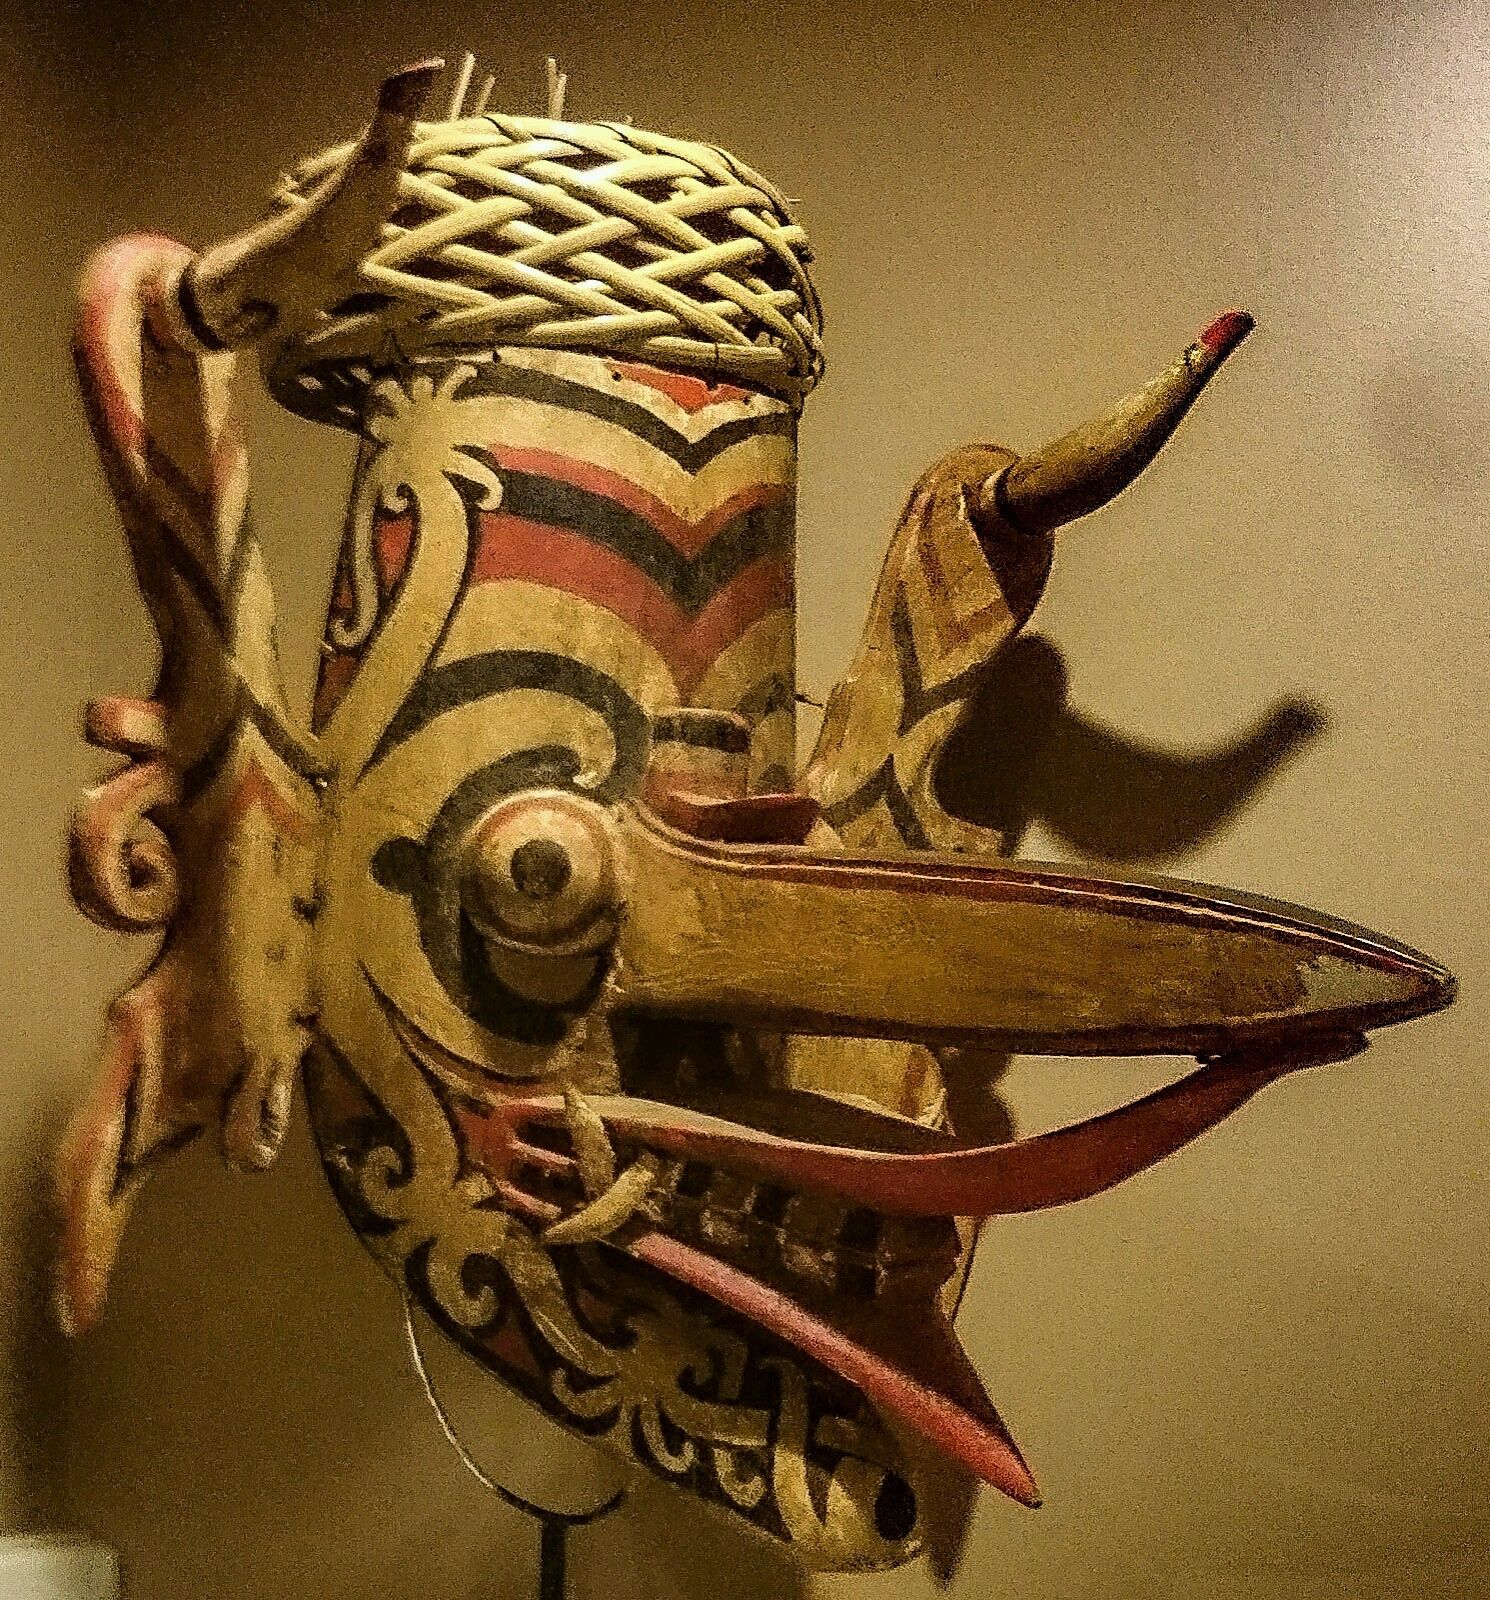
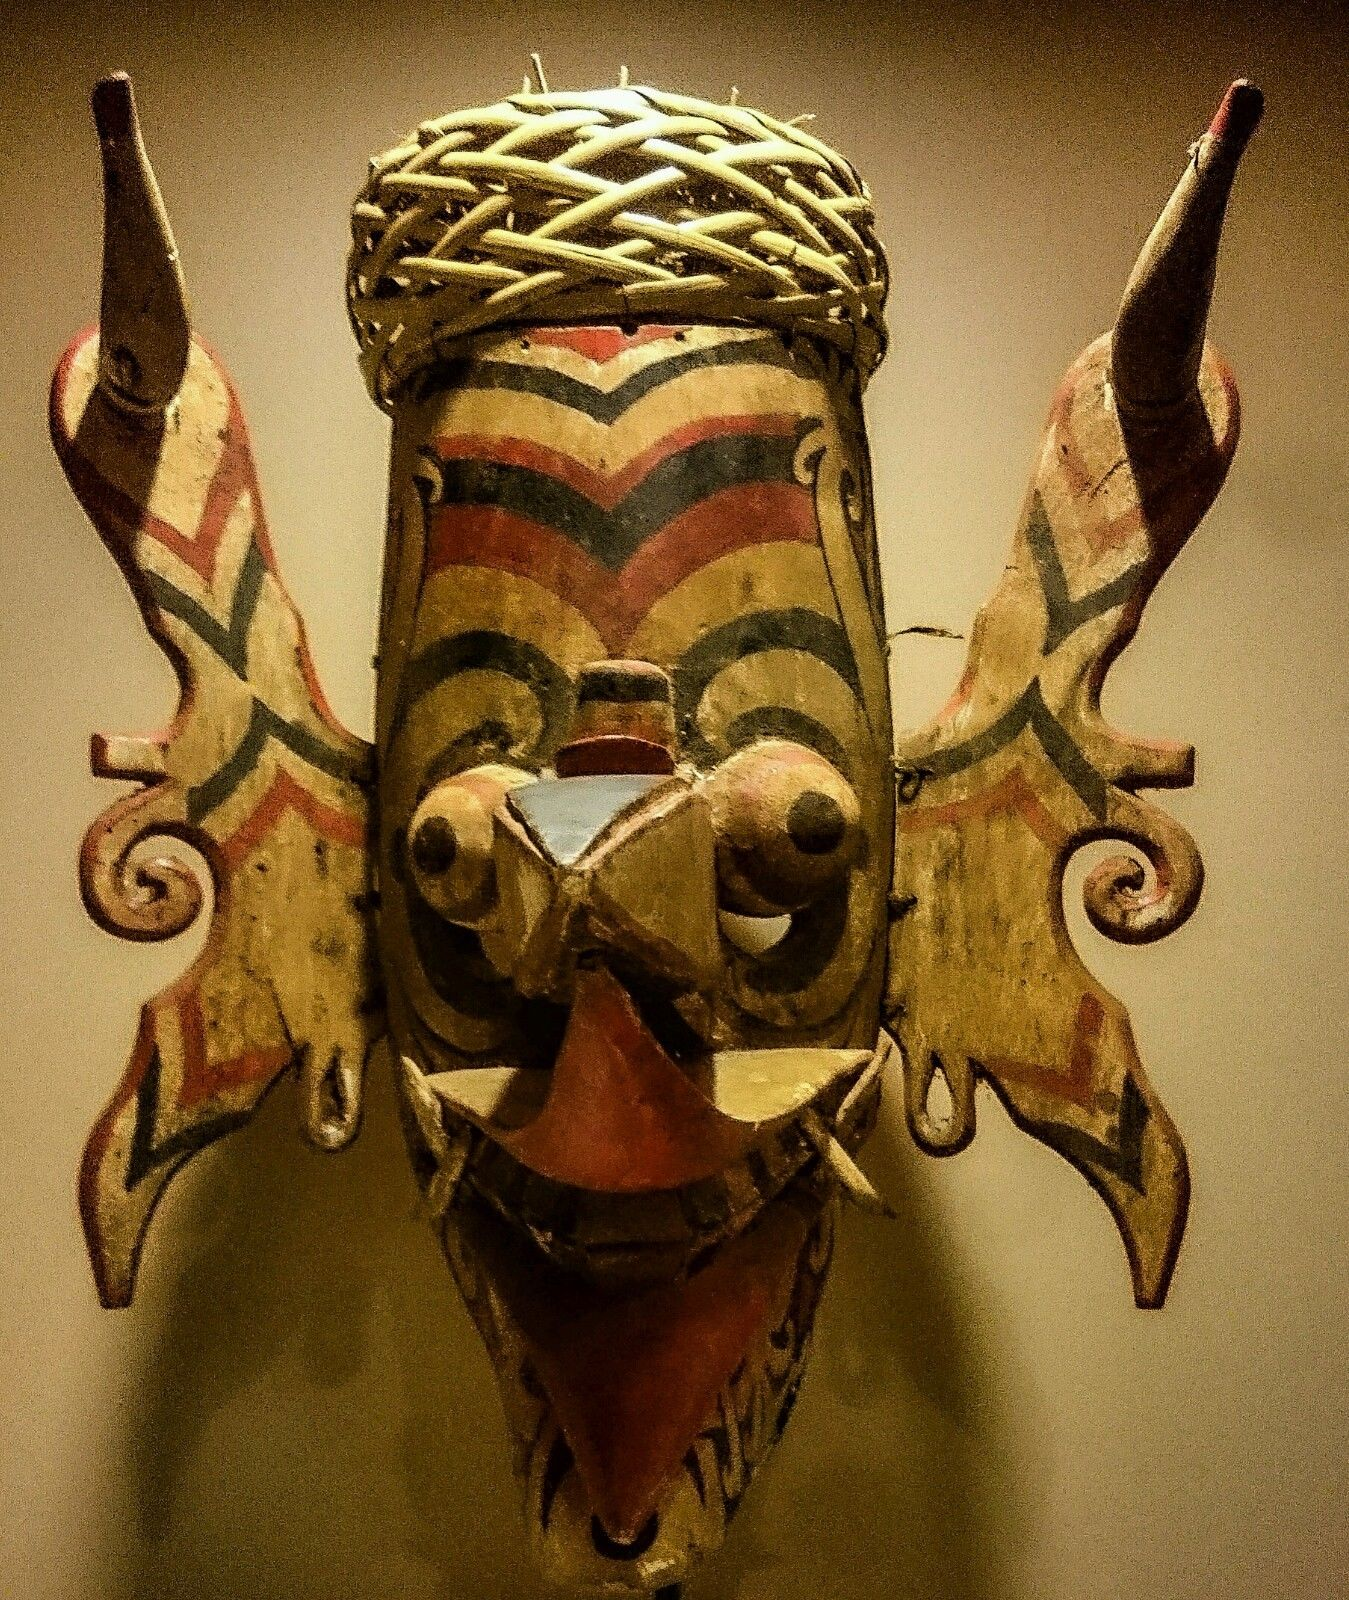
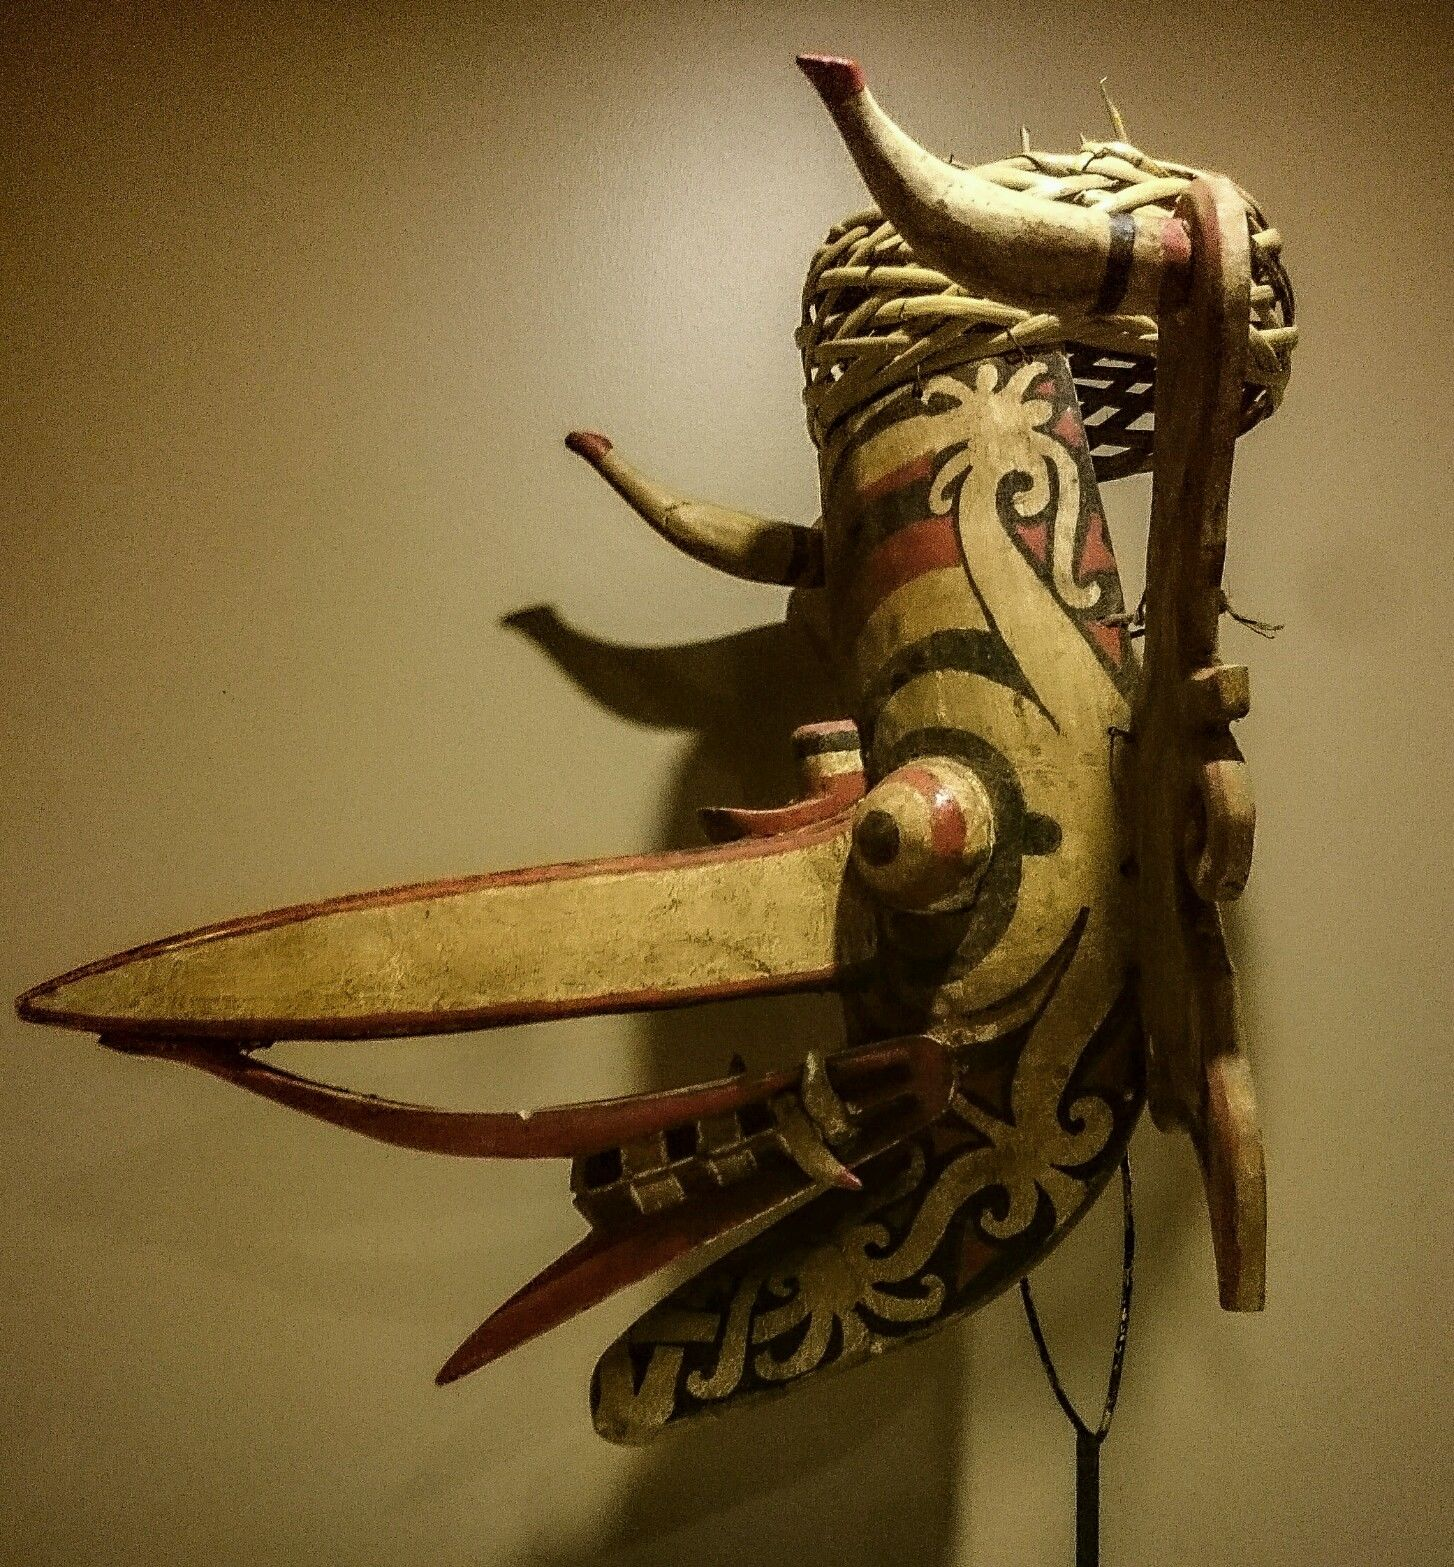
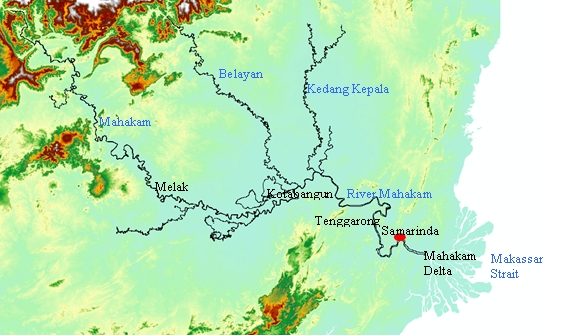
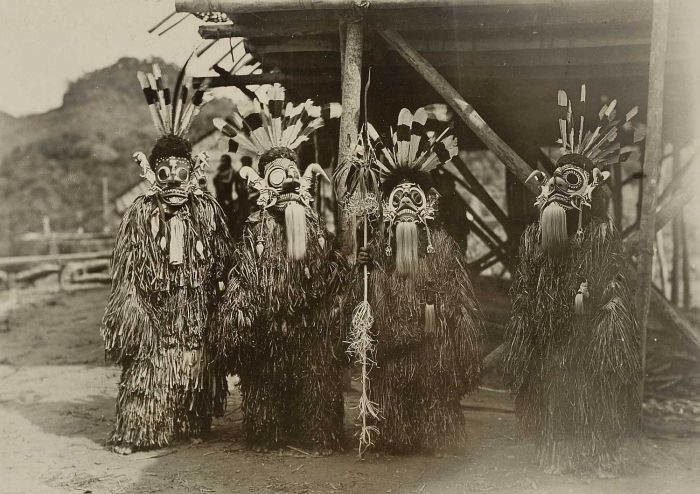

In [246]:
display(HTML(html1))


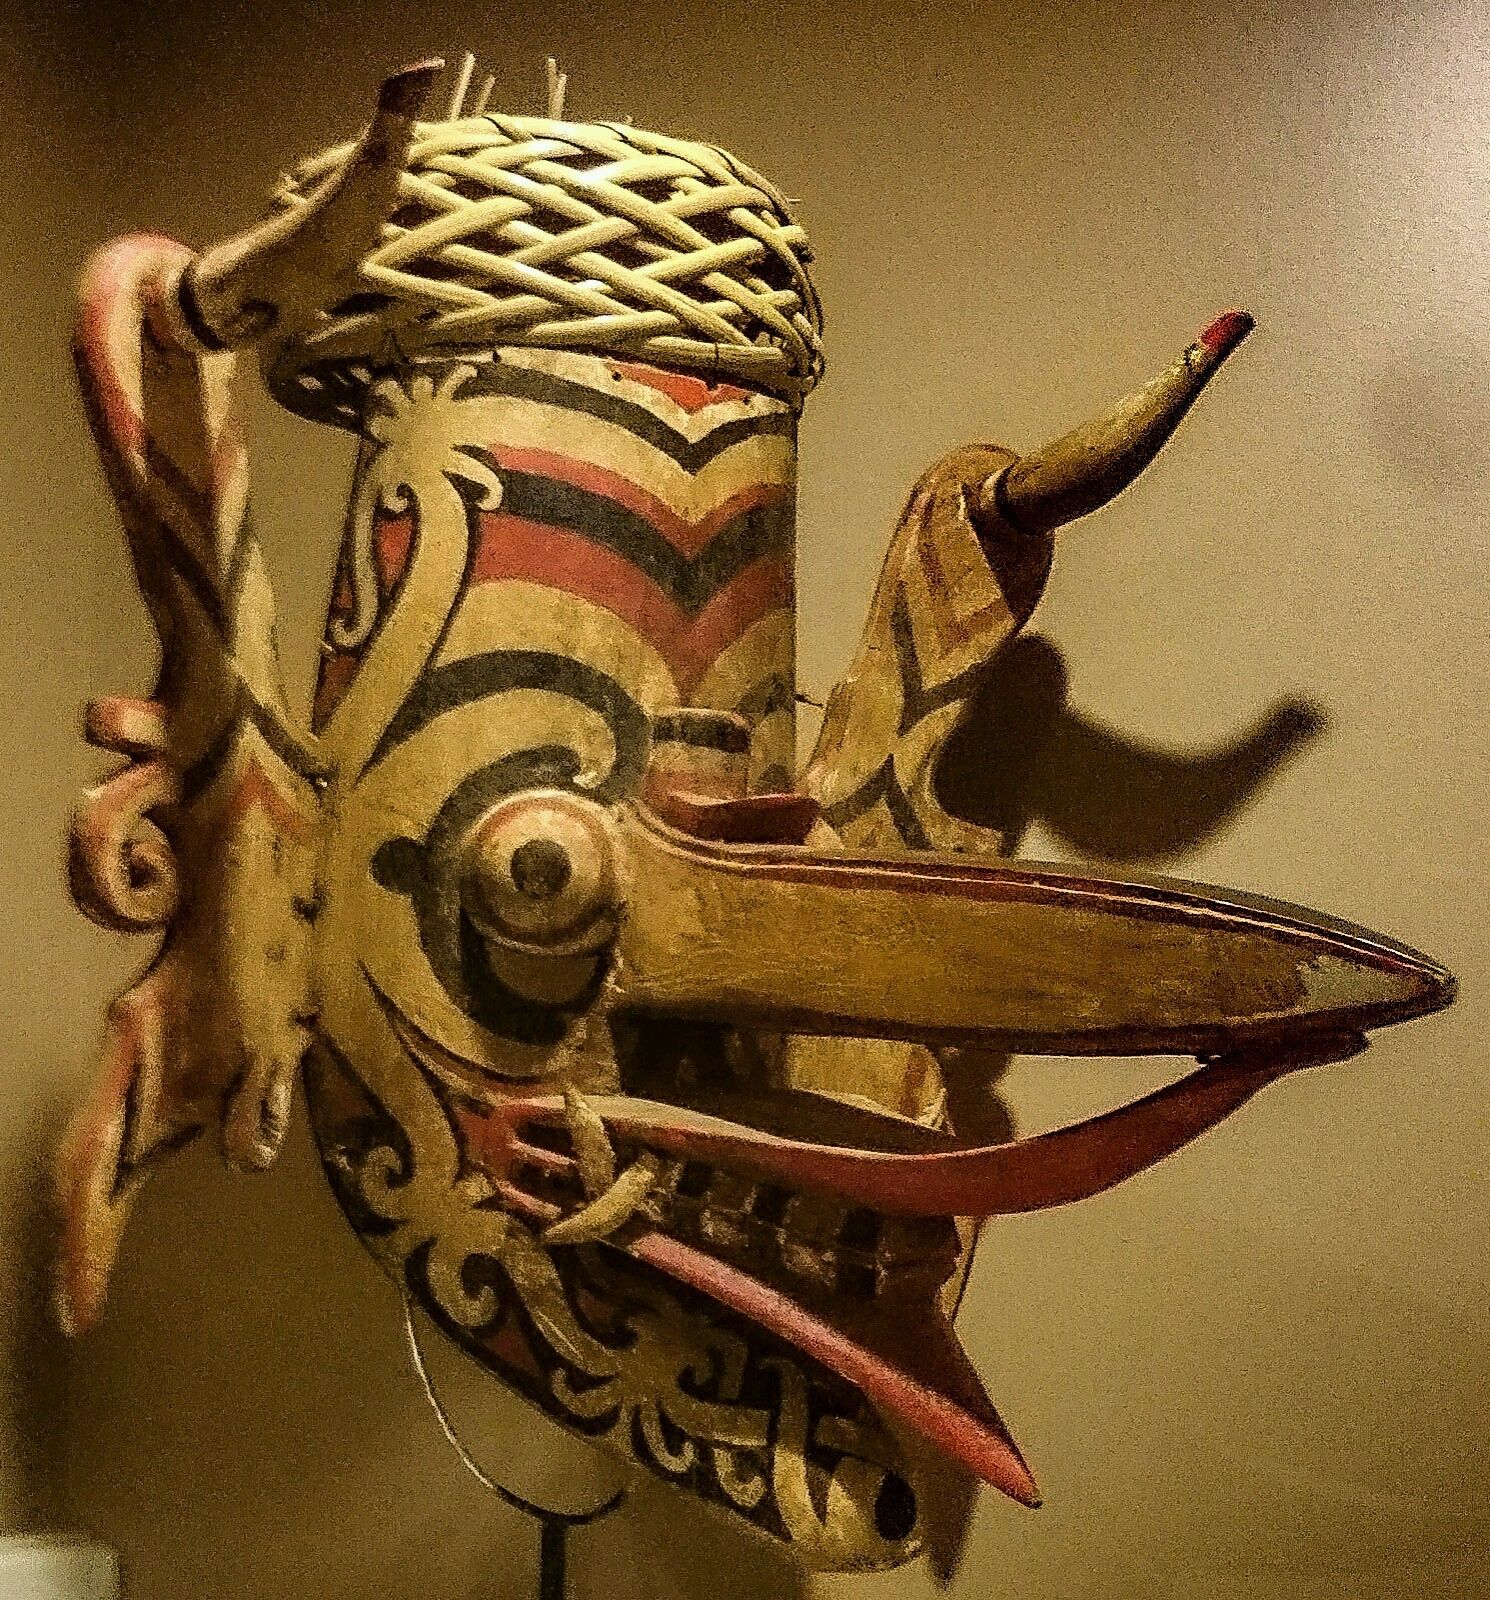
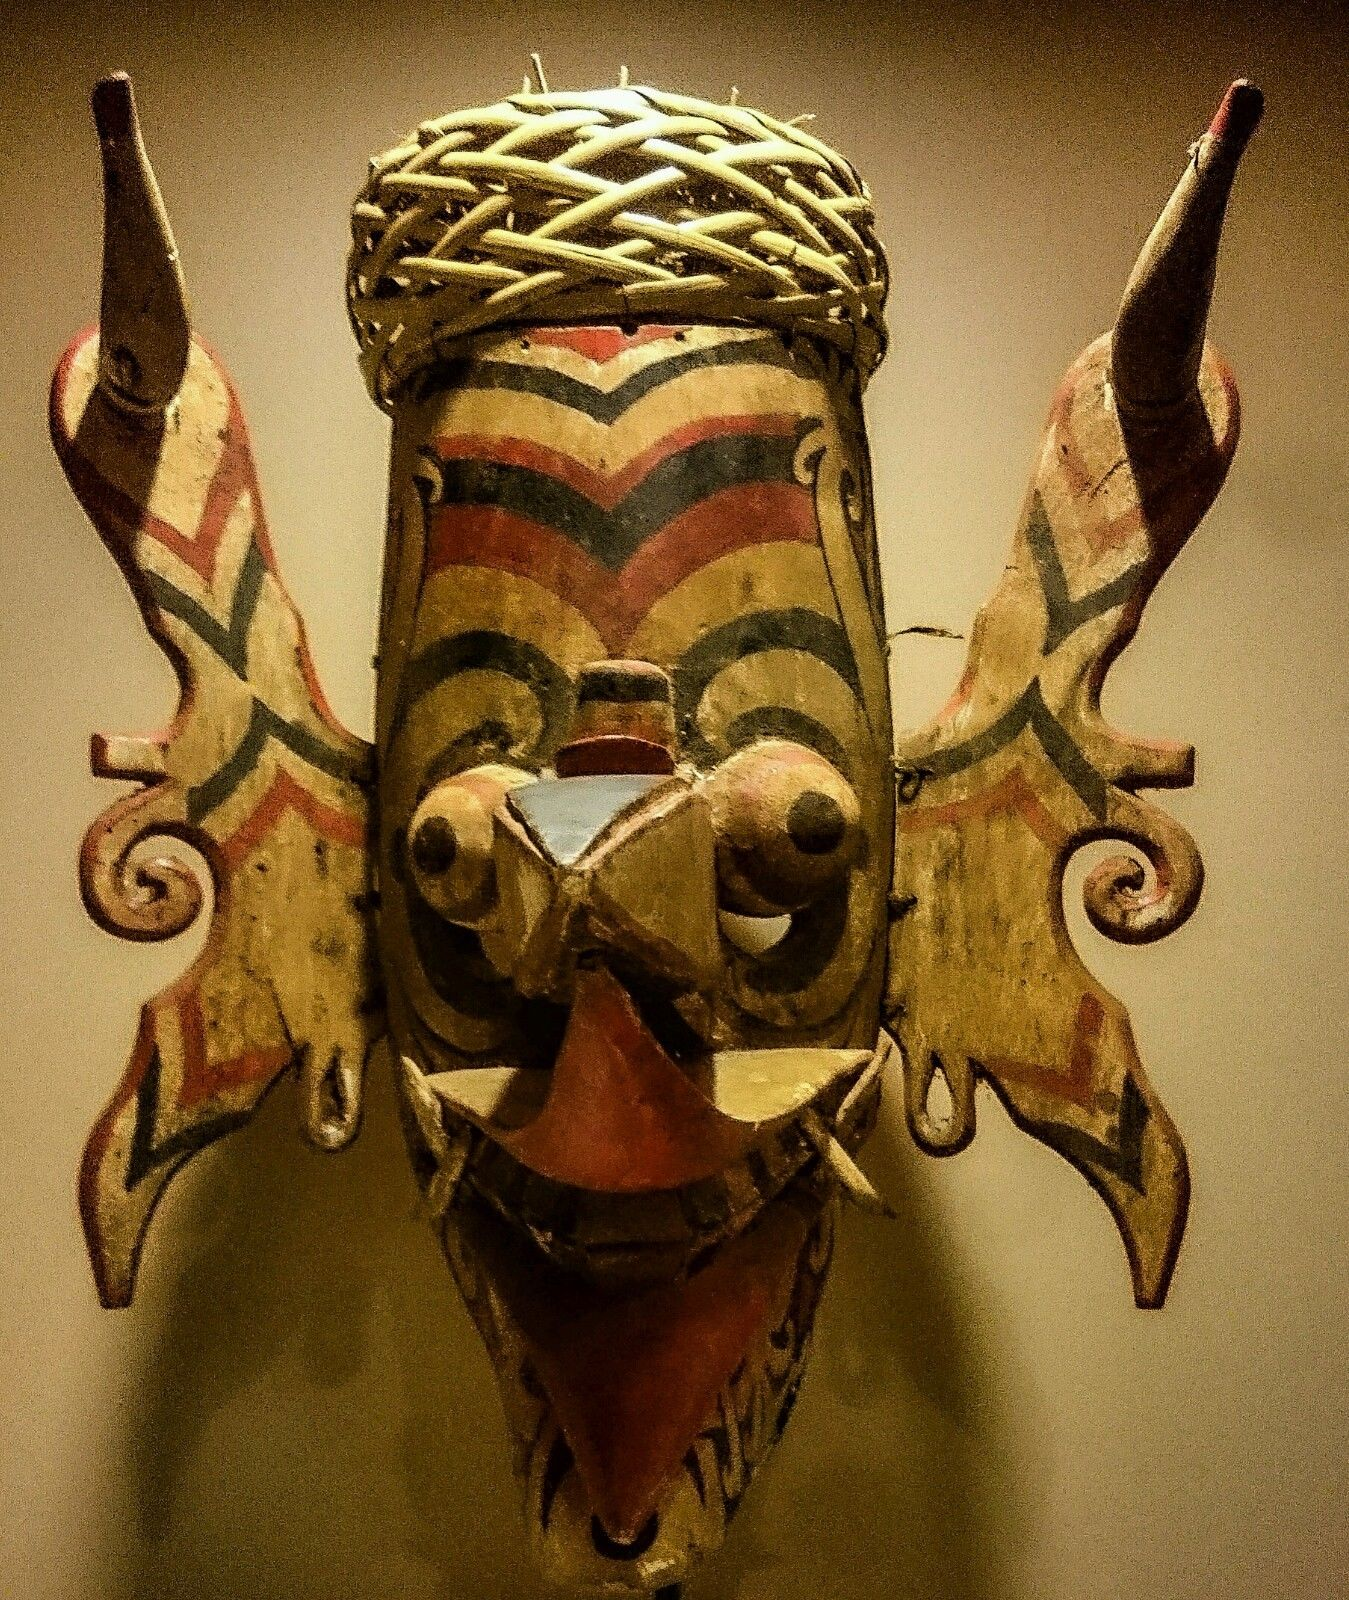
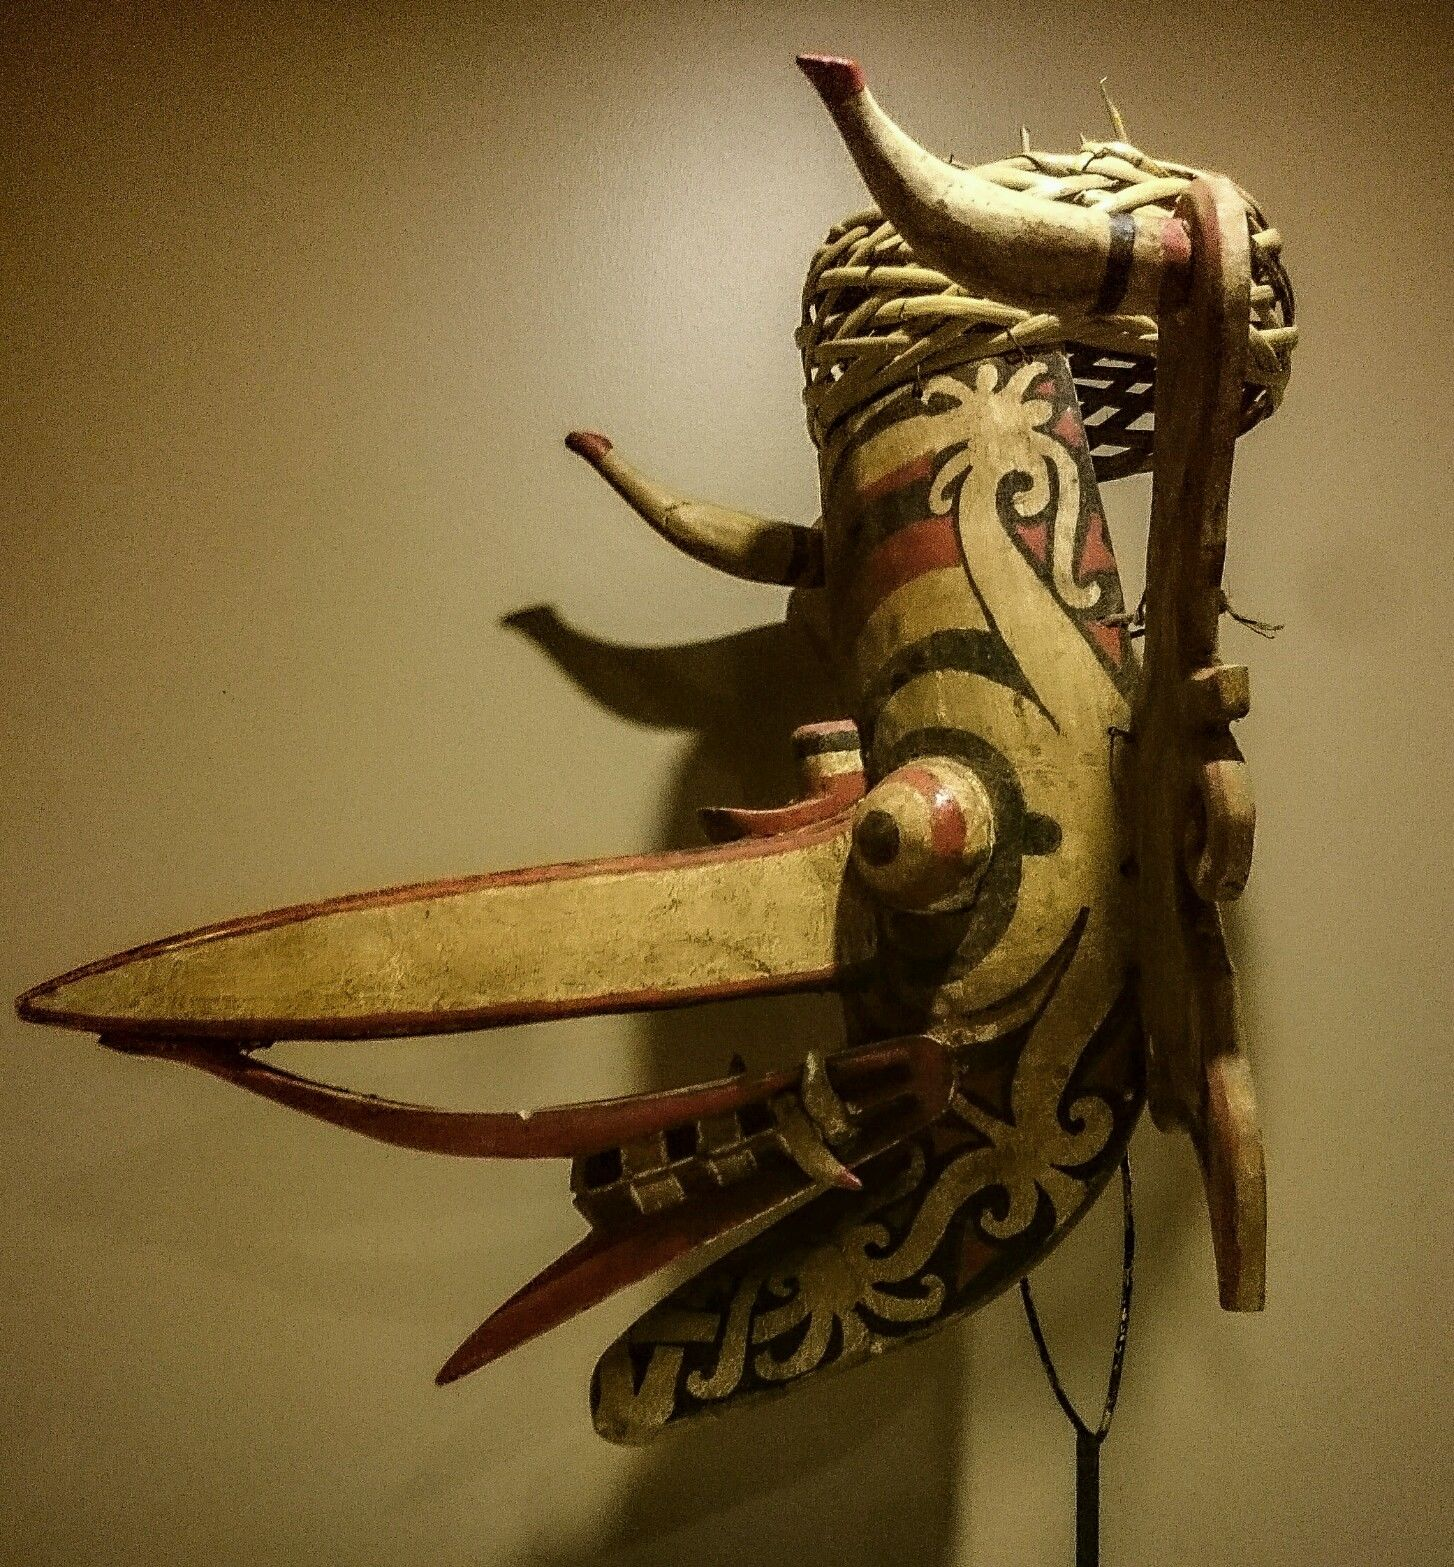
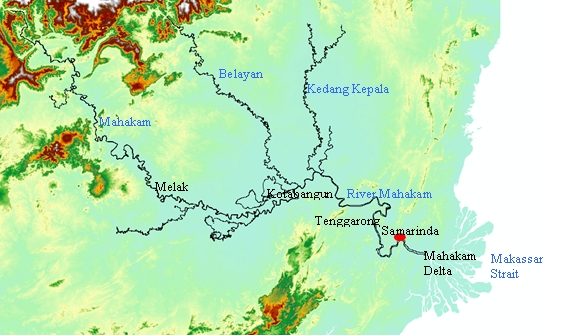
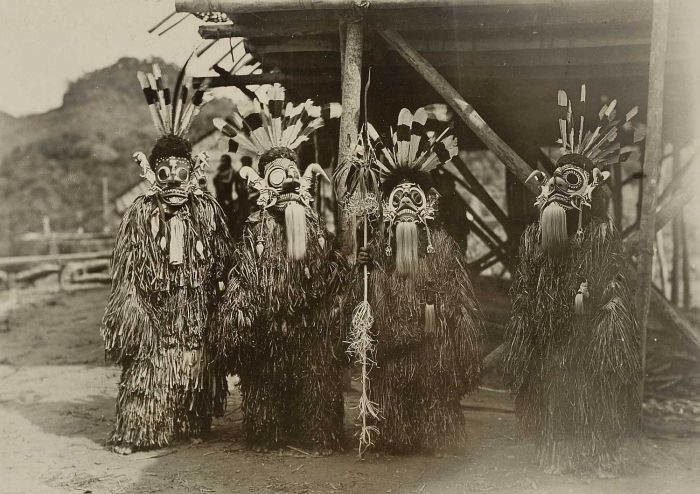

In [247]:
display(HTML(html2))

In [ ]:
# MEASURE SIMILARITY OF ALL FILENAMES TO DETECT DUPLICATES AND NEAR DUPLICATES

allFilesGlob = "/Users/mettinger/Desktop/rockArtProjectData/**/*.html"
allFiles = glob.glob(allFilesGlob, recursive=True)
print(len(allFiles))

simNameList = []

for i in range(len(allFiles)):
    if i % 1000 == 0:
        print(i)
    firstPath = allFiles[i]
    firstName = firstPath.split('/')[-1].split('.')[0]
    for j in range(i + 1, len(allFiles)):
        secondPath = allFiles[j]
        secondName = secondPath.split('/')[-1].split('.')[0]
        score = SequenceMatcher(None, firstName, secondName).ratio()
        simNameList.append((firstPath, secondPath, score))
        
simNameList = sorted(simNameList, key = lambda x: x[2], reverse = True)

print("identical filenames: " + str(len([i for i in simList if i[2] == 1])))

4494
0


In [ ]:
# WRITE SIMILARITY FILE

numEntries = 1000

with open('/Users/mettinger/Desktop/similarList.txt', 'w') as f:
    for item in simList[0:numEntries]:
        f.write("%s\n" % item[0])
        f.write("%s\n" % item[1])
        f.write("%s\n" % str(item[2]))
        f.write("\n\n")